In [38]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
np.random.seed(0)

from sklearn.datasets import load_iris
from sklearn.metrics import f1_score
iris = load_iris()

In [42]:
x = iris.data
y = iris.target

y = np.array([0 if i <= 1 else 1 for i in y])

perm = np.random.permutation(y.size)
x = x[perm][:]
y = y[perm][:]

# x = x[:, 2:]
y = y.reshape(-1, 1)

print('features: ', iris.feature_names)

features:  ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


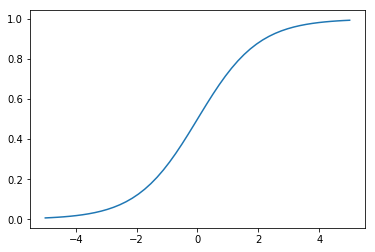

In [40]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

plt.plot(np.linspace(-5, 5), sigmoid(np.linspace(-5, 5)))

initial loss:  2.5355779419105438
final loss:  0.12701082187448043
accuracy score:  0.970873786407767


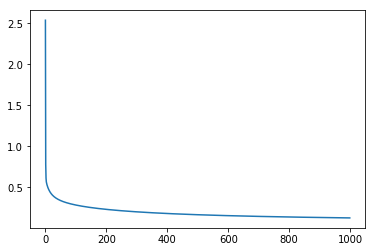

In [50]:
def step(x, y, w, b, lr):
    z = np.dot(w.T, x) + b
    a = sigmoid(z)
    
    dz = a - y
    dw = np.dot(x, dz.T) / y.size
    db = np.sum(dz) / y.size
    
    w = w - lr * dw
    b = b - lr * db
    
    z = np.dot(w.T, x) + b
    a = sigmoid(z)
    loss = np.mean(-y * np.log(a) - (1-y) * np.log(1-a))
    
    return w, b, loss

epochs = 1000
lr = 0.1
initial_w = np.random.rand(4, 1)
initial_b = np.random.rand(1, 1)
loss = np.zeros(epochs)

w = initial_w
b = initial_b
for epoch in range(epochs):
    w, b, loss[epoch] = step(x.T, y.T, w, b, lr)
    
print('initial loss: ', loss[0])
print('final loss: ', loss[-1])

z = np.dot(w.T, x.T) + b
a = sigmoid(z).reshape(-1)
a = [0 if prob <= 0.5 else 1 for prob in a]

print('accuracy score: ', f1_score(a, y))
    
plt.plot(np.arange(epochs), loss)
plt.show()